In [783]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [784]:
    ## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [785]:
data=pd.read_csv("diabetic_data.csv")

In [786]:
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [787]:
data.head(5)
data.tail(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [788]:
data.isnull().sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
weight                         0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
payer_code                     0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide 

There are Null values in diagnosis columns

In [789]:
data.describe(include="int64").transpose()

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [790]:
data.describe(include="object").transpose()

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101745,716,428,6862
diag_2,101408,748,276,6752
diag_3,100343,789,250,11555
max_glu_serum,101766,4,None,96420


In [791]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [792]:
print("INt64 columns")
data.select_dtypes("int64")
print("object columns")
data.select_dtypes("object")

INt64 columns


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,0,0,9
101762,443847782,74694222,1,4,5,5,33,3,18,0,0,1,9
101763,443854148,41088789,1,1,7,1,53,0,9,1,0,0,13
101764,443857166,31693671,2,3,7,10,45,2,21,0,0,1,9


object columns


,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,NaN,NaN,None,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,None,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,None,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,MC,?,250.13,291,458,None,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),?,MC,?,560,276,787,None,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),?,MC,?,38,590,296,None,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),?,MC,Surgery-General,996,285,998,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [793]:
data["readmitted"]=data["readmitted"].replace("<30",0)
data["readmitted"]=data["readmitted"].replace("NO",0)
data["readmitted"]=data["readmitted"].replace(">30",1)

In [794]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [795]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")

encounter_id: Number of unique values 101766
patient_nbr: Number of unique values 71518
race: Number of unique values 6
gender: Number of unique values 3
age: Number of unique values 10
weight: Number of unique values 10
admission_type_id: Number of unique values 8
discharge_disposition_id: Number of unique values 26
admission_source_id: Number of unique values 17
time_in_hospital: Number of unique values 14
payer_code: Number of unique values 18
medical_specialty: Number of unique values 73
num_lab_procedures: Number of unique values 118
num_procedures: Number of unique values 7
num_medications: Number of unique values 75
number_outpatient: Number of unique values 39
number_emergency: Number of unique values 33
number_inpatient: Number of unique values 21
diag_1: Number of unique values 716
diag_2: Number of unique values 748
diag_3: Number of unique values 789
number_diagnoses: Number of unique values 16
max_glu_serum: Number of unique values 4
A1Cresult: Number of unique values 4
me

In [796]:
df=data
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [797]:
df["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [798]:
rdx = df[df['race'] == '?'].index
df = df.drop(rdx, axis = 0)
df["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [799]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [800]:
df['race']= label_encoder.fit_transform(df['race']).astype('int64') 
df['gender']= label_encoder.fit_transform(df['gender']).astype('int64')
df['max_glu_serum']= label_encoder.fit_transform(df['max_glu_serum'])
df['A1Cresult']= label_encoder.fit_transform(df['A1Cresult'])
df['metformin']= label_encoder.fit_transform(df['metformin'])

df['repaglinide']= label_encoder.fit_transform(df['repaglinide'])
df['nateglinide']= label_encoder.fit_transform(df['nateglinide'])
df['chlorpropamide']= label_encoder.fit_transform(df['chlorpropamide'])
df['glimepiride']= label_encoder.fit_transform(df['glimepiride'])
df['acetohexamide']= label_encoder.fit_transform(df['acetohexamide'])

df['glipizide']= label_encoder.fit_transform(df['glipizide'])
df['glyburide']= label_encoder.fit_transform(df['glyburide'])
df['tolbutamide']= label_encoder.fit_transform(df['tolbutamide'])
df['pioglitazone']= label_encoder.fit_transform(df['pioglitazone'])
df['rosiglitazone']= label_encoder.fit_transform(df['rosiglitazone'])

df['acarbose']= label_encoder.fit_transform(df['acarbose'])
df['miglitol']= label_encoder.fit_transform(df['miglitol'])
df['troglitazone']= label_encoder.fit_transform(df['troglitazone'])
df['tolazamide']= label_encoder.fit_transform(df['tolazamide'])
df['examide']= label_encoder.fit_transform(df['examide'])

df['citoglipton']= label_encoder.fit_transform(df['citoglipton'])
df['insulin']= label_encoder.fit_transform(df['insulin'])
df['glyburide-metformin']= label_encoder.fit_transform(df['glyburide-metformin'])
df['glipizide-metformin']= label_encoder.fit_transform(df['glipizide-metformin'])
df['glimepiride-pioglitazone']= label_encoder.fit_transform(df['glimepiride-pioglitazone'])

df['metformin-rosiglitazone']= label_encoder.fit_transform(df['metformin-rosiglitazone'])
df['metformin-pioglitazone']= label_encoder.fit_transform(df['metformin-pioglitazone'])
df['change']= label_encoder.fit_transform(df['change'])
df['diabetesMed']= label_encoder.fit_transform(df['diabetesMed'])



Converting all categorical values in data to O and 1
Alternate method to change  
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

In [801]:
df.corr()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,1.000000,0.514156,0.097139,0.004837,-0.157603,-0.134787,-0.114316,-0.063559,-0.027769,-0.013173,...,NaN,0.048238,0.034564,0.000620,0.002123,NaN,0.007390,-0.095763,0.051825,-0.036314
patient_nbr,0.514156,1.000000,0.150143,0.006403,-0.012404,-0.141320,-0.035142,-0.025935,0.014934,-0.019005,...,NaN,0.002137,0.029694,-0.003663,-0.001082,NaN,-0.001084,-0.054383,0.018988,0.070512
race,0.097139,0.150143,1.000000,0.067214,0.102563,-0.008008,0.022136,-0.019567,-0.022012,0.028670,...,NaN,-0.019705,0.009842,0.004534,0.001257,NaN,0.001257,-0.013493,0.001799,0.001764
gender,0.004837,0.006403,0.067214,1.000000,0.015102,-0.020920,-0.003253,-0.029462,-0.002981,0.060837,...,NaN,0.002674,0.004144,0.007056,-0.002935,NaN,-0.002935,-0.014466,0.015430,-0.017173
admission_type_id,-0.157603,-0.012404,0.102563,0.015102,1.000000,0.081917,0.108702,-0.012411,-0.142439,0.128800,...,NaN,-0.006258,-0.002367,-0.004457,-0.002245,NaN,0.002126,-0.007629,0.000127,0.001960
discharge_disposition_id,-0.134787,-0.141320,-0.008008,-0.020920,0.081917,1.000000,0.016729,0.162860,0.023008,0.015095,...,NaN,-0.021370,-0.004236,0.000392,-0.001637,NaN,-0.000442,0.012996,-0.028368,-0.050920
admission_source_id,-0.114316,-0.035142,0.022136,-0.003253,0.108702,0.016729,1.000000,-0.007352,0.048765,-0.134222,...,NaN,-0.011071,-0.023095,-0.000437,0.000957,NaN,-0.003714,-0.002331,0.001432,0.036072
time_in_hospital,-0.063559,-0.025935,-0.019567,-0.029462,-0.012411,0.162860,-0.007352,1.000000,0.317671,0.193234,...,NaN,0.046121,-0.001892,-0.000642,-0.002546,NaN,0.001700,-0.107913,0.061810,0.023961
num_lab_procedures,-0.027769,0.014934,-0.022012,-0.002981,-0.142439,0.023008,0.048765,0.317671,1.000000,0.058407,...,NaN,0.034222,-0.010064,-0.007587,-0.000817,NaN,-0.003231,-0.062720,0.032150,0.026908
num_procedures,-0.013173,-0.019005,0.028670,0.060837,0.128800,0.015095,-0.134222,0.193234,0.058407,1.000000,...,NaN,0.010426,-0.000678,-0.005382,-0.002495,NaN,-0.000634,-0.003737,-0.006638,-0.038106


In [802]:
df.drop(["patient_nbr"],axis=1,inplace=True)
df.drop(["payer_code"],axis=1,inplace=True)
df.drop(["encounter_id"],axis=1,inplace=True)
df.drop(["examide"],axis=1,inplace=True)
df.drop(["citoglipton"],axis=1,inplace=True)
df.drop(["weight"],axis=1,inplace=True)
df.drop(["medical_specialty"],axis=1,inplace=True)

Removed 

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99493 non-null  int64 
 1   gender                    99493 non-null  int64 
 2   age                       99493 non-null  object
 3   admission_type_id         99493 non-null  int64 
 4   discharge_disposition_id  99493 non-null  int64 
 5   admission_source_id       99493 non-null  int64 
 6   time_in_hospital          99493 non-null  int64 
 7   num_lab_procedures        99493 non-null  int64 
 8   num_procedures            99493 non-null  int64 
 9   num_medications           99493 non-null  int64 
 10  number_outpatient         99493 non-null  int64 
 11  number_emergency          99493 non-null  int64 
 12  number_inpatient          99493 non-null  int64 
 13  diag_1                    99474 non-null  object
 14  diag_2               

In [804]:
df.corr()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,1.000000,0.067214,0.102563,-0.008008,0.022136,-0.019567,-0.022012,0.028670,0.029330,0.043907,...,-0.000185,-0.019705,0.009842,0.004534,0.001257,NaN,0.001257,-0.013493,0.001799,0.001764
gender,0.067214,1.000000,0.015102,-0.020920,-0.003253,-0.029462,-0.002981,0.060837,-0.022686,-0.011953,...,0.007399,0.002674,0.004144,0.007056,-0.002935,NaN,-0.002935,-0.014466,0.015430,-0.017173
admission_type_id,0.102563,0.015102,1.000000,0.081917,0.108702,-0.012411,-0.142439,0.128800,0.079817,0.026705,...,0.008063,-0.006258,-0.002367,-0.004457,-0.002245,NaN,0.002126,-0.007629,0.000127,0.001960
discharge_disposition_id,-0.008008,-0.020920,0.081917,1.000000,0.016729,0.162860,0.023008,0.015095,0.107658,-0.009846,...,0.009157,-0.021370,-0.004236,0.000392,-0.001637,NaN,-0.000442,0.012996,-0.028368,-0.050920
admission_source_id,0.022136,-0.003253,0.108702,0.016729,1.000000,-0.007352,0.048765,-0.134222,-0.054908,0.025962,...,0.001821,-0.011071,-0.023095,-0.000437,0.000957,NaN,-0.003714,-0.002331,0.001432,0.036072
time_in_hospital,-0.019567,-0.029462,-0.012411,0.162860,-0.007352,1.000000,0.317671,0.193234,0.466381,-0.009542,...,-0.003266,0.046121,-0.001892,-0.000642,-0.002546,NaN,0.001700,-0.107913,0.061810,0.023961
num_lab_procedures,-0.022012,-0.002981,-0.142439,0.023008,0.048765,0.317671,1.000000,0.058407,0.266993,-0.008556,...,-0.000445,0.034222,-0.010064,-0.007587,-0.000817,NaN,-0.003231,-0.062720,0.032150,0.026908
num_procedures,0.028670,0.060837,0.128800,0.015095,-0.134222,0.193234,0.058407,1.000000,0.385538,-0.024937,...,0.002119,0.010426,-0.000678,-0.005382,-0.002495,NaN,-0.000634,-0.003737,-0.006638,-0.038106
num_medications,0.029330,-0.022686,0.079817,0.107658,-0.054908,0.466381,0.266993,0.385538,1.000000,0.044528,...,-0.003258,0.077257,0.009548,0.003536,-0.003524,NaN,0.001551,-0.245284,0.186421,0.022444
number_outpatient,0.043907,-0.011953,0.026705,-0.009846,0.025962,-0.009542,-0.008556,-0.024937,0.044528,1.000000,...,-0.005340,0.013628,-0.006307,0.001478,-0.000927,NaN,-0.000927,-0.024460,0.016609,0.071806


In [805]:
df["age"].value_counts()

[70-80)     25469
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: age, dtype: int64

In [806]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

In [807]:
df["age"].value_counts()

8     25469
7     21988
6     16895
9     16800
5      9465
4      3699
10     2724
3      1611
2       682
1       160
Name: age, dtype: int64

In [808]:
df.head(21)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,1,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,0
1,2,0,2,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,1
2,0,0,3,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,0
3,2,1,4,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,0
4,2,1,5,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,0
5,2,1,6,2,1,2,3,31,6,16,...,0,2,1,0,0,0,0,1,1,1
6,2,1,7,3,1,2,4,70,1,21,...,0,2,1,0,0,0,0,0,1,0
7,2,1,8,1,1,7,5,73,0,12,...,0,1,1,0,0,0,0,1,1,1
8,2,0,9,2,1,4,13,68,2,28,...,0,2,1,0,0,0,0,0,1,0
9,2,0,10,3,3,4,12,33,3,18,...,0,2,1,0,0,0,0,0,1,0


In [809]:
readmission_count=pd.DataFrame(df["readmitted"].value_counts())
readmission_count

,readmitted
0,64486
1,35007


In [810]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99493 non-null  int64 
 1   gender                    99493 non-null  int64 
 2   age                       99493 non-null  int64 
 3   admission_type_id         99493 non-null  int64 
 4   discharge_disposition_id  99493 non-null  int64 
 5   admission_source_id       99493 non-null  int64 
 6   time_in_hospital          99493 non-null  int64 
 7   num_lab_procedures        99493 non-null  int64 
 8   num_procedures            99493 non-null  int64 
 9   num_medications           99493 non-null  int64 
 10  number_outpatient         99493 non-null  int64 
 11  number_emergency          99493 non-null  int64 
 12  number_inpatient          99493 non-null  int64 
 13  diag_1                    99474 non-null  object
 14  diag_2               

In [811]:
df.isnull().sum()

race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        19
diag_2                       336
diag_3                      1349
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [812]:
df=df.dropna()

In [813]:
dff = df.groupby(['diag_1'])['diag_1'].count()
dff1 = df.groupby(['diag_2'])['diag_2'].count()
dff2 = df.groupby(['diag_3'])['diag_3'].count()
dff
dff1
dff2

diag_1
10      1
11     10
110     2
112    73
114     1
       ..
V60     1
V63     8
V66     2
V67     1
V71     9
Name: diag_1, Length: 713, dtype: int64

diag_2
11       3
110      7
112    193
114      1
115      1
      ... 
V69      1
V70      7
V72     13
V85    166
V86      2
Name: diag_2, Length: 740, dtype: int64

diag_3
11       2
110     20
111      1
112    204
115      1
      ... 
V66     18
V70      2
V72      8
V85     94
V86      3
Name: diag_3, Length: 786, dtype: int64

In [814]:
def map_diagnosis(data, cols):
  for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

created a function to replace E and V code prefix diagnosis codes with -1

In [815]:
map_diagnosis(df,["diag_1","diag_2","diag_3"])

In [816]:
df.groupby(['diag_1'])['diag_1'].count()
df.groupby(['diag_2'])['diag_2'].count()
df.groupby(['diag_3'])['diag_3'].count()

diag_1
-1.0      1601
 3.0        13
 5.0         9
 7.0         2
 8.0       500
          ... 
 995.0      77
 996.0    1926
 997.0     414
 998.0     752
 999.0      27
Name: diag_1, Length: 670, dtype: int64

diag_2
-1.0      2451
 5.0         1
 7.0         1
 8.0       190
 9.0         6
          ... 
 995.0     112
 996.0     441
 997.0     369
 998.0     551
 999.0      34
Name: diag_2, Length: 619, dtype: int64

diag_3
-1.0      4974
 3.0         2
 5.0         3
 7.0         1
 8.0       180
          ... 
 995.0     288
 996.0     275
 997.0     290
 998.0     312
 999.0      23
Name: diag_3, Length: 646, dtype: int64

In [817]:
df["diag_1"]=df["diag_1"].apply(lambda x:0 if x<0 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:1 if x>0 and x<=139 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:2 if  x>140 and x<=239 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:3 if  x>239 and x<=279 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:4 if  x>279 and x<=289 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:5 if  x>289 and x<=319 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:6 if  x>319 and x<=389 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:7 if  x>389 and x<=459 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:8 if  x>459 and x<=519 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:9 if  x>519 and x<=579 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:10 if  x>=580 and x<=629 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:11 if  x>=630 and x<=679 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:12 if  x>=680 and x<=709 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:13 if  x>=710 and x<=739 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:14 if  x>=740 and x<=759 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:15 if  x>=760 and x<=779 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:16 if  x>=780 and x<=799 else x)
df["diag_1"]=df["diag_1"].apply(lambda x:17 if  x>=800 and x<=999 else x)


In [818]:
df["diag_2"]=df["diag_2"].apply(lambda x:0 if x<0 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:1 if x>0 and x<=139 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:2 if  x>140 and x<=239 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:3 if  x>239 and x<=279 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:4 if  x>279 and x<=289 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:5 if  x>289 and x<=319 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:6 if  x>319 and x<=389 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:7 if  x>389 and x<=459 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:8 if  x>459 and x<=519 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:9 if  x>519 and x<=579 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:10 if  x>=580 and x<=629 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:11 if  x>=630 and x<=679 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:12 if  x>=680 and x<=709 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:13 if  x>=710 and x<=739 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:14 if  x>=740 and x<=759 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:15 if  x>=760 and x<=779 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:16 if  x>=780 and x<=799 else x)
df["diag_2"]=df["diag_2"].apply(lambda x:17 if  x>=800 and x<=999 else x)

In [819]:
df["diag_3"]=df["diag_3"].apply(lambda x:0 if x<0 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:1 if x>0 and x<=139 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:2 if  x>140 and x<=239 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:3 if  x>239 and x<=279 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:4 if  x>279 and x<=289 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:5 if  x>289 and x<=319 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:6 if  x>319 and x<=389 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:7 if  x>389 and x<=459 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:8 if  x>459 and x<=519 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:9 if  x>519 and x<=579 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:10 if  x>=580 and x<=629 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:11 if  x>=630 and x<=679 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:12 if  x>=680 and x<=709 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:13 if  x>=710 and x<=739 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:14 if  x>=740 and x<=759 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:15 if  x>=760 and x<=779 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:16 if  x>=780 and x<=799 else x)
df["diag_3"]=df["diag_3"].apply(lambda x:17 if  x>=800 and x<=999 else x)

Replacing diagnosis code with by 0-16 based on the icd diagnosis code grouping>

List of ICD-9 codes 001–139: infectious and parasitic diseases
List of ICD-9 codes 140–239: neoplasms
List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs
List of ICD-9 codes 290–319: mental disorders
List of ICD-9 codes 320–389: diseases of the nervous system and sense organs
List of ICD-9 codes 390–459: diseases of the circulatory system
List of ICD-9 codes 460–519: diseases of the respiratory system
List of ICD-9 codes 520–579: diseases of the digestive system
List of ICD-9 codes 580–629: diseases of the genitourinary system
List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium
List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue
List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue
List of ICD-9 codes 740–759: congenital anomalies
List of ICD-9 codes 760–779: certain conditions originating in the perinatal period
List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions
List of ICD-9 codes 800–999: injury and poisoning
List of ICD-9 codes E and V codes: external causes of injury and supplemental classification

In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      98053 non-null  int64  
 1   gender                    98053 non-null  int64  
 2   age                       98053 non-null  int64  
 3   admission_type_id         98053 non-null  int64  
 4   discharge_disposition_id  98053 non-null  int64  
 5   admission_source_id       98053 non-null  int64  
 6   time_in_hospital          98053 non-null  int64  
 7   num_lab_procedures        98053 non-null  int64  
 8   num_procedures            98053 non-null  int64  
 9   num_medications           98053 non-null  int64  
 10  number_outpatient         98053 non-null  int64  
 11  number_emergency          98053 non-null  int64  
 12  number_inpatient          98053 non-null  int64  
 13  diag_1                    98053 non-null  float64
 14  diag_

array([[<AxesSubplot:xlabel='num_procedures', ylabel='num_procedures'>,
        <AxesSubplot:xlabel='num_medications', ylabel='num_procedures'>,
        <AxesSubplot:xlabel='number_emergency', ylabel='num_procedures'>],
       [<AxesSubplot:xlabel='num_procedures', ylabel='num_medications'>,
        <AxesSubplot:xlabel='num_medications', ylabel='num_medications'>,
        <AxesSubplot:xlabel='number_emergency', ylabel='num_medications'>],
       [<AxesSubplot:xlabel='num_procedures', ylabel='number_emergency'>,
        <AxesSubplot:xlabel='num_medications', ylabel='number_emergency'>,
        <AxesSubplot:xlabel='number_emergency', ylabel='number_emergency'>]],
      dtype=object)

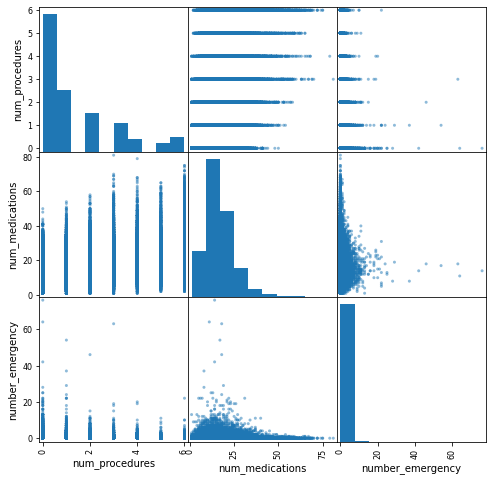

In [821]:
pd.plotting.scatter_matrix(df[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))


array([[<AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'admission_type_id'}>,
        <AxesSubplot:title={'center':'discharge_disposition_id'}>,
        <AxesSubplot:title={'center':'admission_source_id'}>,
        <AxesSubplot:title={'center':'time_in_hospital'}>],
       [<AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>,
        <AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>,
        <AxesSubplot:title={'center':'number_inpatient'}>,
        <AxesSubplot:title={'center':'diag_1'}>],
       [<AxesSubplot:title={'center':'diag_2'}>,
        <AxesSubplot:title={'center':'diag_3'}>,
        <AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:title={'center':'max_glu_se

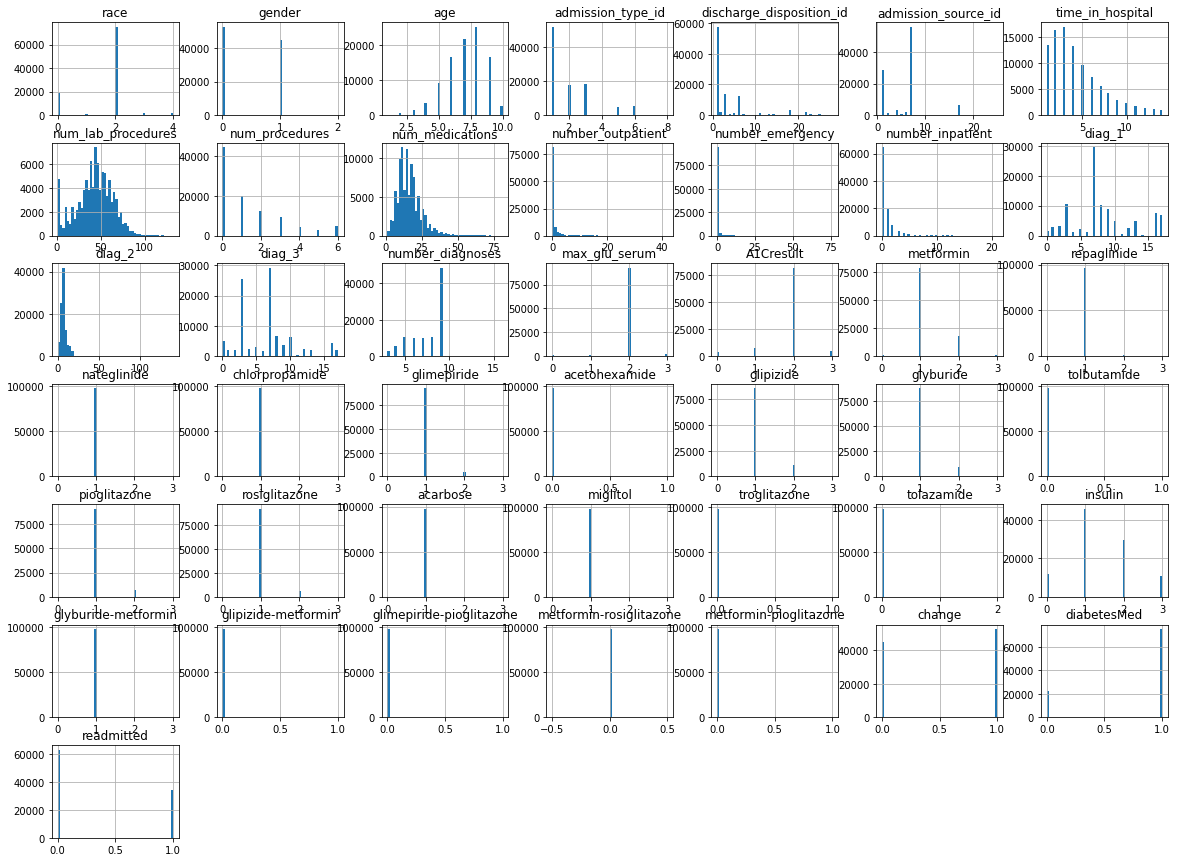

In [822]:
df.hist(bins=50,figsize=(20,15))

In [823]:
df1=df[["race","gender","age","admission_type_id","discharge_disposition_id","admission_source_id","time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses","max_glu_serum","A1Cresult","metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide","glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","tolazamide","insulin","glyburide-metformin","glipizide-metformin","glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","change","diabetesMed","readmitted"
]]

In [824]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      98053 non-null  int64  
 1   gender                    98053 non-null  int64  
 2   age                       98053 non-null  int64  
 3   admission_type_id         98053 non-null  int64  
 4   discharge_disposition_id  98053 non-null  int64  
 5   admission_source_id       98053 non-null  int64  
 6   time_in_hospital          98053 non-null  int64  
 7   num_lab_procedures        98053 non-null  int64  
 8   num_procedures            98053 non-null  int64  
 9   num_medications           98053 non-null  int64  
 10  number_outpatient         98053 non-null  int64  
 11  number_emergency          98053 non-null  int64  
 12  number_inpatient          98053 non-null  int64  
 13  diag_1                    98053 non-null  float64
 14  diag_

In [825]:
X = df1.drop('readmitted', axis = 1)
Y = df1['readmitted']

In [826]:
from sklearn.model_selection import train_test_split

In [827]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state = 0,stratify=Y)

In [828]:
X_train.shape
Y_train.shape
X_test.shape
Y_test.shape
Y_train.head()
Y_test.head()

(78442, 39)

(78442,)

(19611, 39)

(19611,)

42981    1
64831    1
98548    0
76047    0
50671    1
Name: readmitted, dtype: int64

31817    0
19374    0
5673     1
23062    0
93221    1
Name: readmitted, dtype: int64

In [829]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
X_test

array([[-1.92844996,  1.07923736, -2.65021466, ...,  0.        ,
         0.92496559, -1.81966601],
       [ 0.39581766, -0.92648518, -0.72505711, ...,  0.        ,
        -1.0811213 ,  0.5495514 ],
       [-0.76631615,  1.07923736,  0.55838126, ...,  0.        ,
         0.92496559, -1.81966601],
       ...,
       [ 0.39581766,  1.07923736, -1.36677629, ...,  0.        ,
         0.92496559,  0.5495514 ],
       [ 0.39581766, -0.92648518, -0.08333792, ...,  0.        ,
         0.92496559, -1.81966601],
       [ 0.39581766,  1.07923736,  0.55838126, ...,  0.        ,
         0.92496559,  0.5495514 ]])

array([[ 0.39581766, -0.92648518, -0.08333792, ...,  0.        ,
        -1.0811213 ,  0.5495514 ],
       [-1.92844996, -0.92648518,  1.20010045, ...,  0.        ,
         0.92496559, -1.81966601],
       [-1.92844996, -0.92648518, -2.65021466, ...,  0.        ,
        -1.0811213 ,  0.5495514 ],
       ...,
       [ 0.39581766,  1.07923736, -1.36677629, ...,  0.        ,
        -1.0811213 ,  0.5495514 ],
       [ 0.39581766,  1.07923736, -0.08333792, ...,  0.        ,
        -1.0811213 ,  0.5495514 ],
       [ 0.39581766,  1.07923736, -0.72505711, ...,  0.        ,
         0.92496559, -1.81966601]])

In [831]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k=KNeighborsClassifier()
k.fit(X_train,Y_train)
pred=k.predict(X_test)

KNeighborsClassifier()

In [832]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [833]:
print("Confusion Matrix:\n",confusion_matrix(pred,Y_test))
print("Accuracy:",metrics.accuracy_score(Y_test, pred))
print(classification_report(pred,Y_test))

Confusion Matrix:
 [[9807 4911]
 [2874 2019]]
Accuracy: 0.6030289123451125
              precision    recall  f1-score   support

           0       0.77      0.67      0.72     14718
           1       0.29      0.41      0.34      4893

    accuracy                           0.60     19611
   macro avg       0.53      0.54      0.53     19611
weighted avg       0.65      0.60      0.62     19611



DECISION TREE

In [834]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_tree = DecisionTreeClassifier(random_state=0)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
cpred=classifier.predict(X_test)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [835]:
print("Confusion Matrix:\n",confusion_matrix(cpred,Y_test))
print("Accuracy:",metrics.accuracy_score(Y_test, cpred))
print(classification_report(cpred,Y_test))

Confusion Matrix:
 [[8371 4157]
 [4310 2773]]
Accuracy: 0.5682525113456733
              precision    recall  f1-score   support

           0       0.66      0.67      0.66     12528
           1       0.40      0.39      0.40      7083

    accuracy                           0.57     19611
   macro avg       0.53      0.53      0.53     19611
weighted avg       0.57      0.57      0.57     19611



RANDOM FOREST

In [836]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_predict=rf.predict(X_test)

RandomForestClassifier()

In [837]:
print("Confusion Matrix:\n",confusion_matrix(Y_predict,Y_test))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_predict))
print(classification_report(Y_predict,Y_test))

Confusion Matrix:
 [[11163  5357]
 [ 1518  1573]]
Accuracy: 0.6494314415379124
              precision    recall  f1-score   support

           0       0.88      0.68      0.76     16520
           1       0.23      0.51      0.31      3091

    accuracy                           0.65     19611
   macro avg       0.55      0.59      0.54     19611
weighted avg       0.78      0.65      0.69     19611

